In [144]:
import re, string, unicodedata
import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [145]:
import requests

from bs4 import BeautifulSoup

#import text from Times of India website for article based on Budget 2019.
speech=requests.get("https://graphics.straitstimes.com/STI/STIMEDIA/Interactives/2018/08/ndr-speech-analysis-2018/")
soup2 = BeautifulSoup(speech.text, 'html.parser')

In [146]:
speech.status_code

200

In [147]:
sample = BeautifulSoup(speech.text, 'html.parser')
print(sample)

<!DOCTYPE html>
 <html lang="en"> <head> <meta charset="utf-8"/> <title>National Day Rally 2018: Explore PM Leeâs transcript | The Straits Times</title> <meta content="National Day Rally 2018: Explore PM Leeâs transcript" name="title"/> <meta content="Prime Minister Lee Hsien Loong delivered the 2018 National Day Rally speech on Aug 19. What were the hot topics and most-used words? Find out with this speech analysis." name="description"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="True" name="HandheldFriendly"> <meta content="yes" name="apple-mobile-web-app-capable"/> <meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=no" name="viewport"/> <meta content="ST" name="apple-mobile-web-app-title"> <meta content="The Straits Times" name="application-name"> <meta content="#0c2b57" name="msapplication-TileColor"> <meta content="#0c2b57" name="theme-color"/> <meta content="Singapore news" property="article:section"> <meta content="Nati

In [148]:
# kill all script and style elements
for script in sample(["script", "style"]):
    script.extract()    # rip it out

In [149]:
# get text
sample = sample.get_text()

In [150]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

sample = denoise_text(sample)
print(sample)

    National Day Rally 2018: Explore PM Leeâs transcript | The Straits Times                                                            NDR CHATBOT   LIVE BLOG   THE SPEECH                      NDR CHATBOT      LIVE BLOG      THE SPEECH                  NDR2018     National Day Rally 2018: Explore PM Leeâs transcript    Prime Minister Lee Hsien Loong delivered the 2018 National Day Rally speech on Aug 19. Explore the transcript of his English speech. Search by category, most-used words or enter your own search terms.     PUBLISHED: AUG 21, 2018          Top  Category  Free Search                     SEARCH BY CATEGORY  SEARCH BY MOST-USED WORDS  FREE SEARCH                           Speech      Reactions                2018                Source: Prime Ministerâs Office   Produced by:  Jocelyn Tan,  Alyssa Mungcal,  Chen Danning,  Thong Yong Jun,  and Derek Wong          SPH Digital News / Copyright Â© 2018 Singapore Press Holdings Ltd. Co. Regn No. 198402868E. All rights reserve

In [151]:
!pip install contractions

In [152]:
import contractions

In [153]:
def replace_contractions(text):

    """Replace contractions in string of text"""

    return contractions.fix(text)



sample = replace_contractions(sample)

print(sample)

    National Day Rally 2018: Explore PM Leeâs transcript | The Straits Times                                                            NDR CHATBOT   LIVE BLOG   THE SPEECH                      NDR CHATBOT      LIVE BLOG      THE SPEECH                  NDR2018     National Day Rally 2018: Explore PM Leeâs transcript    Prime Minister Lee Hsien Loong delivered the 2018 National Day Rally speech on Aug 19. Explore the transcript of his English speech. Search by category, most-used words or enter your own search terms.     PUBLISHED: AUG 21, 2018          Top  Category  Free Search                     SEARCH BY CATEGORY  SEARCH BY MOST-USED WORDS  FREE SEARCH                           Speech      Reactions                2018                Source: Prime Ministerâs Office   Produced by:  Jocelyn Tan,  Alyssa Mungcal,  Chen Danning,  Thong Yong Jun,  and Derek Wong          SPH Digital News / Copyright Â© 2018 Singapore Press Holdings Ltd. Co. Regn No. 198402868E. All rights reserve

In [154]:
#Tokenization
words = nltk.word_tokenize(sample)
print(words)

['National', 'Day', 'Rally', '2018', ':', 'Explore', 'PM', 'Leeâ\x80\x99s', 'transcript', '|', 'The', 'Straits', 'Times', 'NDR', 'CHATBOT', 'LIVE', 'BLOG', 'THE', 'SPEECH', 'NDR', 'CHATBOT', 'LIVE', 'BLOG', 'THE', 'SPEECH', 'NDR2018', 'National', 'Day', 'Rally', '2018', ':', 'Explore', 'PM', 'Leeâ\x80\x99s', 'transcript', 'Prime', 'Minister', 'Lee', 'Hsien', 'Loong', 'delivered', 'the', '2018', 'National', 'Day', 'Rally', 'speech', 'on', 'Aug', '19', '.', 'Explore', 'the', 'transcript', 'of', 'his', 'English', 'speech', '.', 'Search', 'by', 'category', ',', 'most-used', 'words', 'or', 'enter', 'your', 'own', 'search', 'terms', '.', 'PUBLISHED', ':', 'AUG', '21', ',', '2018', 'Top', 'Category', 'Free', 'Search', 'SEARCH', 'BY', 'CATEGORY', 'SEARCH', 'BY', 'MOST-USED', 'WORDS', 'FREE', 'SEARCH', 'Speech', 'Reactions', '2018', 'Source', ':', 'Prime', 'Ministerâ\x80\x99s', 'Office', 'Produced', 'by', ':', 'Jocelyn', 'Tan', ',', 'Alyssa', 'Mungcal', ',', 'Chen', 'Danning', ',', 'Thong', 'Yo

In [155]:
#NORMALISING the data
# Remove non-ASCII characters from list of tokenized words
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [156]:
#Convert all characters to lowercase from list of tokenized words
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

In [157]:
 #Remove punctuation from list of tokenized words
def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
        return new_words

In [158]:
#Replace all interger occurrences in list of tokenized words with textual representation
def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
        return new_words

In [159]:
def remove_stopwords(words):

    """Remove stop words from list of tokenized words"""

    new_words = []

    for word in words:

        if word not in stopwords.words('english'):

            new_words.append(word)

    return new_words

In [160]:
# Stem words in list of tokenized words
def stem_words(words):
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

In [161]:
 # Lemmatize verbs in list of tokenized words
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [162]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

In [163]:
import inflect

In [164]:
words = normalize(words)
print(words)

['national']


In [165]:
def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems, lemmas
stems, lemmas = stem_and_lemmatize(words)
print('Stemmed:\n', stems)
print('\nLemmatized:\n', lemmas)

Stemmed:
 ['nat']

Lemmatized:
 ['national']


In [166]:
#import all required packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
get_ipython().magic('matplotlib inline')
import seaborn as sns

In [167]:
#Import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [168]:
#specify fonts, stopwords, background color and other options
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',relative_scaling=1.0).generate(sample)

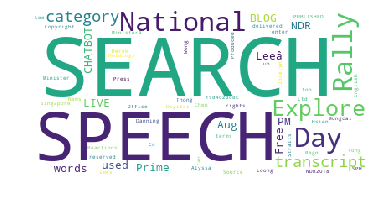

In [169]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [170]:
def wordfreq (lst):
        word_freq={}
        for tok in words:
            if tok.lower() in word_freq:
                word_freq [tok.lower()]+=1
        else:
            word_freq [tok.lower()]=1
            return word_freq

In [171]:
#finding the word lengths in the text
word_lengths = [len(w) for w in words]

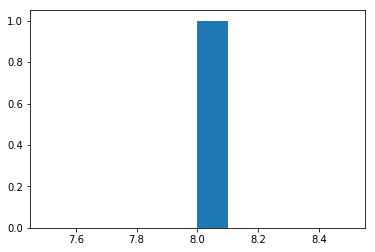

In [172]:
plt.hist(word_lengths)
plt.show()

In [173]:
from nltk.tokenize import word_tokenize

In [174]:
words = word_tokenize(sample)

In [175]:
#Simple text preprocessing - to lower case and removing all non alphabets
from nltk.corpus import stopwords
tokens = [w for w in word_tokenize(sample.lower()) if w.isalpha()]

In [176]:
#To remove stopwords from stop words list which is built in nltk library.
no_stops = [ t for t in tokens if t not in stopwords.words('english')]
print(no_stops)

['national', 'day', 'rally', 'explore', 'pm', 'transcript', 'straits', 'times', 'ndr', 'chatbot', 'live', 'blog', 'speech', 'ndr', 'chatbot', 'live', 'blog', 'speech', 'national', 'day', 'rally', 'explore', 'pm', 'transcript', 'prime', 'minister', 'lee', 'hsien', 'loong', 'delivered', 'national', 'day', 'rally', 'speech', 'aug', 'explore', 'transcript', 'english', 'speech', 'search', 'category', 'words', 'enter', 'search', 'terms', 'published', 'aug', 'top', 'category', 'free', 'search', 'search', 'category', 'search', 'words', 'free', 'search', 'speech', 'reactions', 'source', 'prime', 'office', 'produced', 'jocelyn', 'tan', 'alyssa', 'mungcal', 'chen', 'danning', 'thong', 'yong', 'jun', 'derek', 'wong', 'sph', 'digital', 'news', 'copyright', 'singapore', 'press', 'holdings', 'regn', 'rights', 'reserved']


In [177]:
def wordfreq (lst):
        word_freq={}
        for tok in no_stops:
            if tok.lower() in word_freq:
                word_freq [tok.lower()]+=1
        else:
            word_freq [tok.lower()]=1
            return word_freq

In [178]:
new_tokens = wordfreq(tokens)

In [179]:
import operator
sorted_d = sorted(new_tokens.items(), key=operator.itemgetter(1),reverse=True)
#print('Dictionary in descending order by value : ',sorted_d)
print(sorted_d[:1000])

[('reserved', 1)]


<FreqDist with 54 samples and 84 outcomes>
[('search', 6), ('speech', 5), ('national', 3), ('day', 3), ('rally', 3), ('explore', 3), ('transcript', 3), ('category', 3), ('pm', 2), ('ndr', 2), ('chatbot', 2), ('live', 2), ('blog', 2), ('prime', 2), ('aug', 2), ('words', 2), ('free', 2), ('straits', 1), ('times', 1), ('minister', 1), ('lee', 1), ('hsien', 1), ('loong', 1), ('delivered', 1), ('english', 1)]


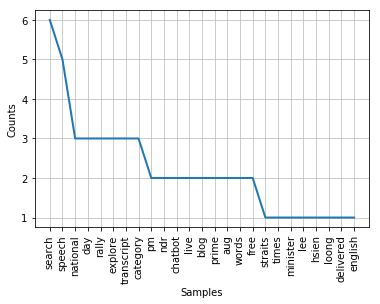

In [181]:
import nltk
Freq_dist_nltk=nltk.FreqDist(no_stops)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)